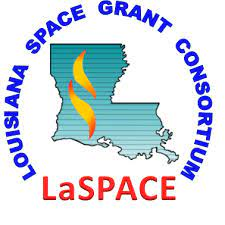

# Making NASA’s Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets

## LURA Project 2020-2021


LURA Project Title: "Making NASA's Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets" <br> This research grant was awarded by the Louisiana Space Grant Consortium (LaSPACE). URL: https://laspace.lsu.edu/about-us/. <br> LaSPACE Grant Number: ##---TBA---##, Primary NASA Grant Number: 80NSSC20M0110.


Project P.I.: Dr. Dhan Lord B. Fortela <br> Apprentice Student: Ashton C. Fremin <br> Department of Chemical Engineering, University of Louisiana at Lafayette, URL: https://chemical.louisiana.edu/


Recent Notebook Revision: 26 Aug 2020


## Notebook Overview:

This Jupyter Notebook is running Python shows that step-by-step workflow from the download to the analysis of the MAVEN datasets.

The PyDIVIDE package is used to download the MAVEN datasets and to perform som graphical analysis of the data. It was created by the MAVEN Team at the University of Colorado - Boulder: https://github.com/MAVENSDC/Pydivide. It is main used in this project to download and read the datasets.

The Self-Organizing Map (SOM) package is available from this GitHub repository: https://github.com/sevamoo/SOMPY.git.

## Install the PyDIVIDE package:

In [ ]:
pip install pydivide # no need to run if pydivide is already installed, just import (next line)

## Import the Python Packages:

In [46]:
import pydivide 
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import sompy
import random
from sklearn.externals import joblib
import glob

## Download MAVEM Data from NASA Datacenter:

Download the target MAVEN dataset into the local directory. This may take minutes depending on the netwrok speed.

After running the code line below, you do not have to run it again; unless you are downloading from another time period.


The download function allows for the specification of destination folder using the 'local_dir=path' argument.

In [ ]:
pydivide.download_files(start_date='2018-06-01',
                              end_date='2018-06-30',
                              local_dir='/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works/on_MAVEN_data',
                              insitu=True,
                               iuvs=True)

## Extract the raw data to working dataset


Reading the downloaded datset. 

In [2]:
insitu= pydivide.read(['2018-06-2', '2018-06-29'],insitu_only=True)

Check the Keys of the data array:

In [3]:
insitu.keys()

odict_keys(['TimeString', 'Time', 'Orbit', 'IOflag', 'LPW', 'EUV', 'SWEA', 'SWIA', 'STATIC', 'SEP', 'MAG', 'NGIMS', 'MODELED_MAG', 'APP', 'SPACECRAFT'])

We will focus on the SWEA subset of the data:

In [4]:
insitu_SWEA = insitu.get("SWEA")
insitu_SWEA.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER,ELECTRON_SPECTRUM_SHAPE_PARAMETER_QUAL
2018-06-02T00:00:00,NaN,NaN,NaN,NaN,62800000.0,492000.0,209000.0,36700.0,NaN,NaN,53000000.0,429000.0,175000.0,32000.0,NaN,NaN,1.607,NaN
2018-06-02T00:00:04,NaN,NaN,NaN,NaN,42000000.0,408000.0,231000.0,40200.0,NaN,NaN,46400000.0,389000.0,192000.0,32300.0,NaN,NaN,1.720,NaN
2018-06-02T00:00:08,NaN,NaN,NaN,NaN,39600000.0,373000.0,134000.0,27700.0,38400.0,22400.0,44300000.0,404000.0,207000.0,35500.0,25200.0,17800.0,1.649,NaN
2018-06-02T00:00:12,NaN,NaN,NaN,NaN,39600000.0,400000.0,132000.0,29300.0,NaN,NaN,47700000.0,393000.0,247000.0,36800.0,NaN,NaN,1.664,NaN
2018-06-02T00:00:16,NaN,NaN,NaN,NaN,41000000.0,412000.0,97000.0,25900.0,59900.0,31200.0,49200000.0,398000.0,222000.0,33600.0,NaN,NaN,1.675,NaN


Check the number of data:

In [5]:
insitu_SWEA.count()

SOLAR_WIND_ELECTRON_DENSITY                       249601
SOLAR_WIND_ELECTRON_DENSITY_QUAL                  249601
SOLAR_WIND_ELECTRON_TEMPERATURE                   249601
SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL              249601
ELECTRON_PARALLEL_FLUX_LOW                        315014
Electron eflux  Parallel (5-100 ev) Quality       315015
ELECTRON_PARALLEL_FLUX_MID                        314942
Electron eflux  Parallel (100-500 ev) Quality     314948
ELECTRON_PARALLEL_FLUX_HIGH                       196685
Electron eflux  Parallel (500-1000 ev) Quality    196692
ELECTRON_ANTI_PARALLEL_FLUX_LOW                   314987
Electron eflux  Anti-par (5-100 ev) Quality       314988
ELECTRON_ANTI_PARALLEL_FLUX_MID                   314933
Electron eflux  Anti-par (100-500 ev) Quality     314938
ELECTRON_ANTI_PARALLEL_FLUX_HIGH                  196011
Electron eflux  Anti-par (500-1000 ev) Quality    196021
ELECTRON_SPECTRUM_SHAPE_PARAMETER                 315038
ELECTRON_SPECTRUM_SHAPE_PARAMET

Remove the last column as it has no data:

In [6]:
insitu_SWEA= insitu_SWEA.iloc[: , 0:-1]

In [7]:
insitu_SWEA.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER
2018-06-02T00:00:00,NaN,NaN,NaN,NaN,62800000.0,492000.0,209000.0,36700.0,NaN,NaN,53000000.0,429000.0,175000.0,32000.0,NaN,NaN,1.607
2018-06-02T00:00:04,NaN,NaN,NaN,NaN,42000000.0,408000.0,231000.0,40200.0,NaN,NaN,46400000.0,389000.0,192000.0,32300.0,NaN,NaN,1.720
2018-06-02T00:00:08,NaN,NaN,NaN,NaN,39600000.0,373000.0,134000.0,27700.0,38400.0,22400.0,44300000.0,404000.0,207000.0,35500.0,25200.0,17800.0,1.649
2018-06-02T00:00:12,NaN,NaN,NaN,NaN,39600000.0,400000.0,132000.0,29300.0,NaN,NaN,47700000.0,393000.0,247000.0,36800.0,NaN,NaN,1.664
2018-06-02T00:00:16,NaN,NaN,NaN,NaN,41000000.0,412000.0,97000.0,25900.0,59900.0,31200.0,49200000.0,398000.0,222000.0,33600.0,NaN,NaN,1.675


Remove observations with missing entries:

In [8]:
insitu_SWEA.isnull().sum()

SOLAR_WIND_ELECTRON_DENSITY                        66747
SOLAR_WIND_ELECTRON_DENSITY_QUAL                   66747
SOLAR_WIND_ELECTRON_TEMPERATURE                    66747
SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL               66747
ELECTRON_PARALLEL_FLUX_LOW                          1334
Electron eflux  Parallel (5-100 ev) Quality         1333
ELECTRON_PARALLEL_FLUX_MID                          1406
Electron eflux  Parallel (100-500 ev) Quality       1400
ELECTRON_PARALLEL_FLUX_HIGH                       119663
Electron eflux  Parallel (500-1000 ev) Quality    119656
ELECTRON_ANTI_PARALLEL_FLUX_LOW                     1361
Electron eflux  Anti-par (5-100 ev) Quality         1360
ELECTRON_ANTI_PARALLEL_FLUX_MID                     1415
Electron eflux  Anti-par (100-500 ev) Quality       1410
ELECTRON_ANTI_PARALLEL_FLUX_HIGH                  120337
Electron eflux  Anti-par (500-1000 ev) Quality    120327
ELECTRON_SPECTRUM_SHAPE_PARAMETER                   1310
dtype: int64

In [9]:
insitu_SWEA_clean = insitu_SWEA.dropna()

In [10]:
insitu_SWEA_clean.count()

SOLAR_WIND_ELECTRON_DENSITY                       134341
SOLAR_WIND_ELECTRON_DENSITY_QUAL                  134341
SOLAR_WIND_ELECTRON_TEMPERATURE                   134341
SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL              134341
ELECTRON_PARALLEL_FLUX_LOW                        134341
Electron eflux  Parallel (5-100 ev) Quality       134341
ELECTRON_PARALLEL_FLUX_MID                        134341
Electron eflux  Parallel (100-500 ev) Quality     134341
ELECTRON_PARALLEL_FLUX_HIGH                       134341
Electron eflux  Parallel (500-1000 ev) Quality    134341
ELECTRON_ANTI_PARALLEL_FLUX_LOW                   134341
Electron eflux  Anti-par (5-100 ev) Quality       134341
ELECTRON_ANTI_PARALLEL_FLUX_MID                   134341
Electron eflux  Anti-par (100-500 ev) Quality     134341
ELECTRON_ANTI_PARALLEL_FLUX_HIGH                  134341
Electron eflux  Anti-par (500-1000 ev) Quality    134341
ELECTRON_SPECTRUM_SHAPE_PARAMETER                 134341
dtype: int64

Saving the extracted SWEA data as '.xlsx. file for other use:

In [11]:
insitu_SWEA_clean.to_excel('Data_SWEA.xlsx')

## Import the MAVEN Data:

Trying the MAVEN data:


In [28]:
MAVEN_data = insitu_SWEA_clean
#MAVEN_data = pd.read_csv('/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works/sample_sompy_implement/Basic uses of SOMPY library/cleaned_SWEA_info_csv.csv')

Examine the structure of the data:

In [13]:
MAVEN_data.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER
2018-06-02T00:19:12,1.41,7.310000e-07,11.40,0.000009,35200000.0,946000.0,713000.0,164000.0,94700.0,66900.0,41100000.0,388000.0,892000.0,76800.0,64600.0,31000.0,2.249
2018-06-02T00:20:48,1.55,7.840000e-07,9.60,0.000008,25700000.0,1250000.0,874000.0,260000.0,162000.0,109000.0,33200000.0,331000.0,745000.0,64300.0,73300.0,31400.0,2.614
2018-06-02T00:23:52,5.10,1.590000e-06,10.50,0.000005,33300000.0,609000.0,1660000.0,158000.0,103000.0,63900.0,39700000.0,365000.0,1300000.0,89800.0,26600.0,18800.0,2.739
2018-06-02T00:26:08,1.66,8.210000e-07,9.92,0.000008,21200000.0,696000.0,786000.0,153000.0,103000.0,67200.0,23900000.0,290000.0,1010000.0,80200.0,66100.0,33000.0,2.703
2018-06-02T00:27:28,4.62,1.470000e-06,11.70,0.000006,34300000.0,620000.0,1420000.0,148000.0,111000.0,60900.0,37000000.0,353000.0,1220000.0,87600.0,68100.0,30800.0,3.101


In [14]:
MAVEN_data.count()

SOLAR_WIND_ELECTRON_DENSITY                       134341
SOLAR_WIND_ELECTRON_DENSITY_QUAL                  134341
SOLAR_WIND_ELECTRON_TEMPERATURE                   134341
SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL              134341
ELECTRON_PARALLEL_FLUX_LOW                        134341
Electron eflux  Parallel (5-100 ev) Quality       134341
ELECTRON_PARALLEL_FLUX_MID                        134341
Electron eflux  Parallel (100-500 ev) Quality     134341
ELECTRON_PARALLEL_FLUX_HIGH                       134341
Electron eflux  Parallel (500-1000 ev) Quality    134341
ELECTRON_ANTI_PARALLEL_FLUX_LOW                   134341
Electron eflux  Anti-par (5-100 ev) Quality       134341
ELECTRON_ANTI_PARALLEL_FLUX_MID                   134341
Electron eflux  Anti-par (100-500 ev) Quality     134341
ELECTRON_ANTI_PARALLEL_FLUX_HIGH                  134341
Electron eflux  Anti-par (500-1000 ev) Quality    134341
ELECTRON_SPECTRUM_SHAPE_PARAMETER                 134341
dtype: int64

## Training the SOM on the dataset

Set the size of the SOM to be [row,col]. Set the other SOM parameters in the argument.

As the data is relatively high, the model takes some time to train. We didn't finetune the hyperparameters of the algorithm and this is a potential improvement topic.

In [55]:
%%time
# Train the model with different parameters. 
#The more, the better. 
#Each iteration is stored in disk for further study

for i in range(2):
    som = sompy.SOMFactory().build(MAVEN_data.values, 
                                   mapsize=[random.choice(list(range(15, 25))),random.choice(list(range(10, 15)))],
                                   normalization = 'var', 
                                   initialization='random', 
                                   #component_names=component_names, 
                                   lattice="hexa")
    som.train(n_job=4, train_rough_len=5, train_finetune_len=10)
    joblib.dump(som, "model_{}.joblib".format(i))

 Training...
 random_initialization took: 0.005000 seconds
 Rough training...
 radius_ini: 6.000000 , radius_final: 1.000000, trainlen: 5

 epoch: 1 ---> elapsed time:  0.910000, quantization error: 42.172873

 epoch: 2 ---> elapsed time:  0.790000, quantization error: 3.222791

 epoch: 3 ---> elapsed time:  0.795000, quantization error: 3.063902

 epoch: 4 ---> elapsed time:  0.812000, quantization error: 2.905707

 epoch: 5 ---> elapsed time:  0.814000, quantization error: 2.450950

 Finetune training...
 radius_ini: 1.500000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.802000, quantization error: 1.699155

 epoch: 2 ---> elapsed time:  0.828000, quantization error: 1.822348

 epoch: 3 ---> elapsed time:  0.789000, quantization error: 1.765931

 epoch: 4 ---> elapsed time:  0.813000, quantization error: 1.722748

 epoch: 5 ---> elapsed time:  0.823000, quantization error: 1.683453

 epoch: 6 ---> elapsed time:  0.822000, quantization error: 1.645454

 epoch

CPU times: user 47.4 s, sys: 25.5 s, total: 1min 12s
Wall time: 25.7 s


Calculate the SOM model Topographic error and Quantization error:

In [59]:
# Study the models trained and plot the errors obtained in order to select the best one
models_pool = glob.glob("./model*")
errors=[]
for model_filepath in models_pool:
    som = joblib.load(model_filepath)
    topographic_error = som.calculate_topographic_error()
    quantization_error = som.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
e_top, e_q = zip(*errors)

Plot the Topographic error and Quantization error:

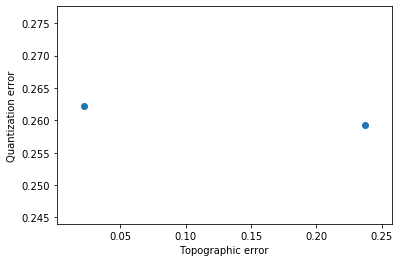

In [60]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [15]:
mapsize = [55,50]
som = sompy.SOMFactory.build(MAVEN_data.values, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
 pca_linear_initialization took: 0.364000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 1

 epoch: 1 ---> elapsed time:  8.159000, quantization error: 1.803559

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  7.714000, quantization error: 1.478096

 Final quantization error: 1.478096
 train took: 16.278000 seconds


In [24]:
topographic_error = som.calculate_topographic_error()
quantization_error = som.calculate_quantization_error()

0.0011388928175315057 0.23120737489619791


In [25]:
print(topographic_error, quantization_error)

0.0011388928175315057 0.23120737489619791


In [34]:
som.component_names = list(MAVEN_data.columns)
print(som.component_names)

[['SOLAR_WIND_ELECTRON_DENSITY' 'SOLAR_WIND_ELECTRON_DENSITY_QUAL'
  'SOLAR_WIND_ELECTRON_TEMPERATURE'
  'SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL' 'ELECTRON_PARALLEL_FLUX_LOW'
  'Electron eflux  Parallel (5-100 ev) Quality'
  'ELECTRON_PARALLEL_FLUX_MID'
  'Electron eflux  Parallel (100-500 ev) Quality'
  'ELECTRON_PARALLEL_FLUX_HIGH'
  'Electron eflux  Parallel (500-1000 ev) Quality'
  'ELECTRON_ANTI_PARALLEL_FLUX_LOW'
  'Electron eflux  Anti-par (5-100 ev) Quality'
  'ELECTRON_ANTI_PARALLEL_FLUX_MID'
  'Electron eflux  Anti-par (100-500 ev) Quality'
  'ELECTRON_ANTI_PARALLEL_FLUX_HIGH'
  'Electron eflux  Anti-par (500-1000 ev) Quality'
  'ELECTRON_SPECTRUM_SHAPE_PARAMETER']]


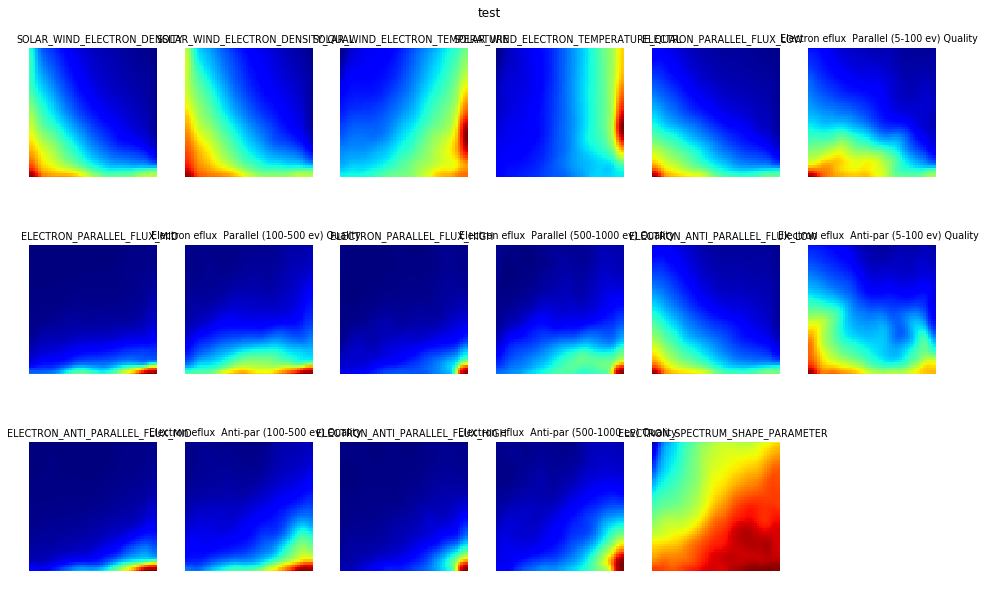

In [17]:

v = sompy.mapview.View2DPacked(55, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
#v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=17) #which_dim='all' default
v.show(som, what='codebook', which_dim='all', cmap='jet') #which_dim='all' default
# v.save('2d_packed_test')

Showing selected components. Select components by specifying the index in 'which_dim=[...]' argument.

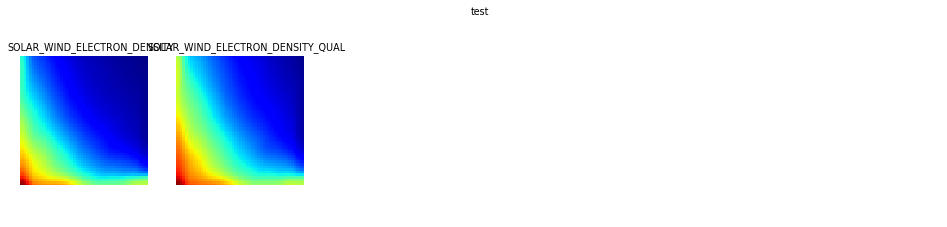

In [18]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim=[0,1], cmap='jet') #which_dim='all' default



Clustering the SOM:

In [19]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


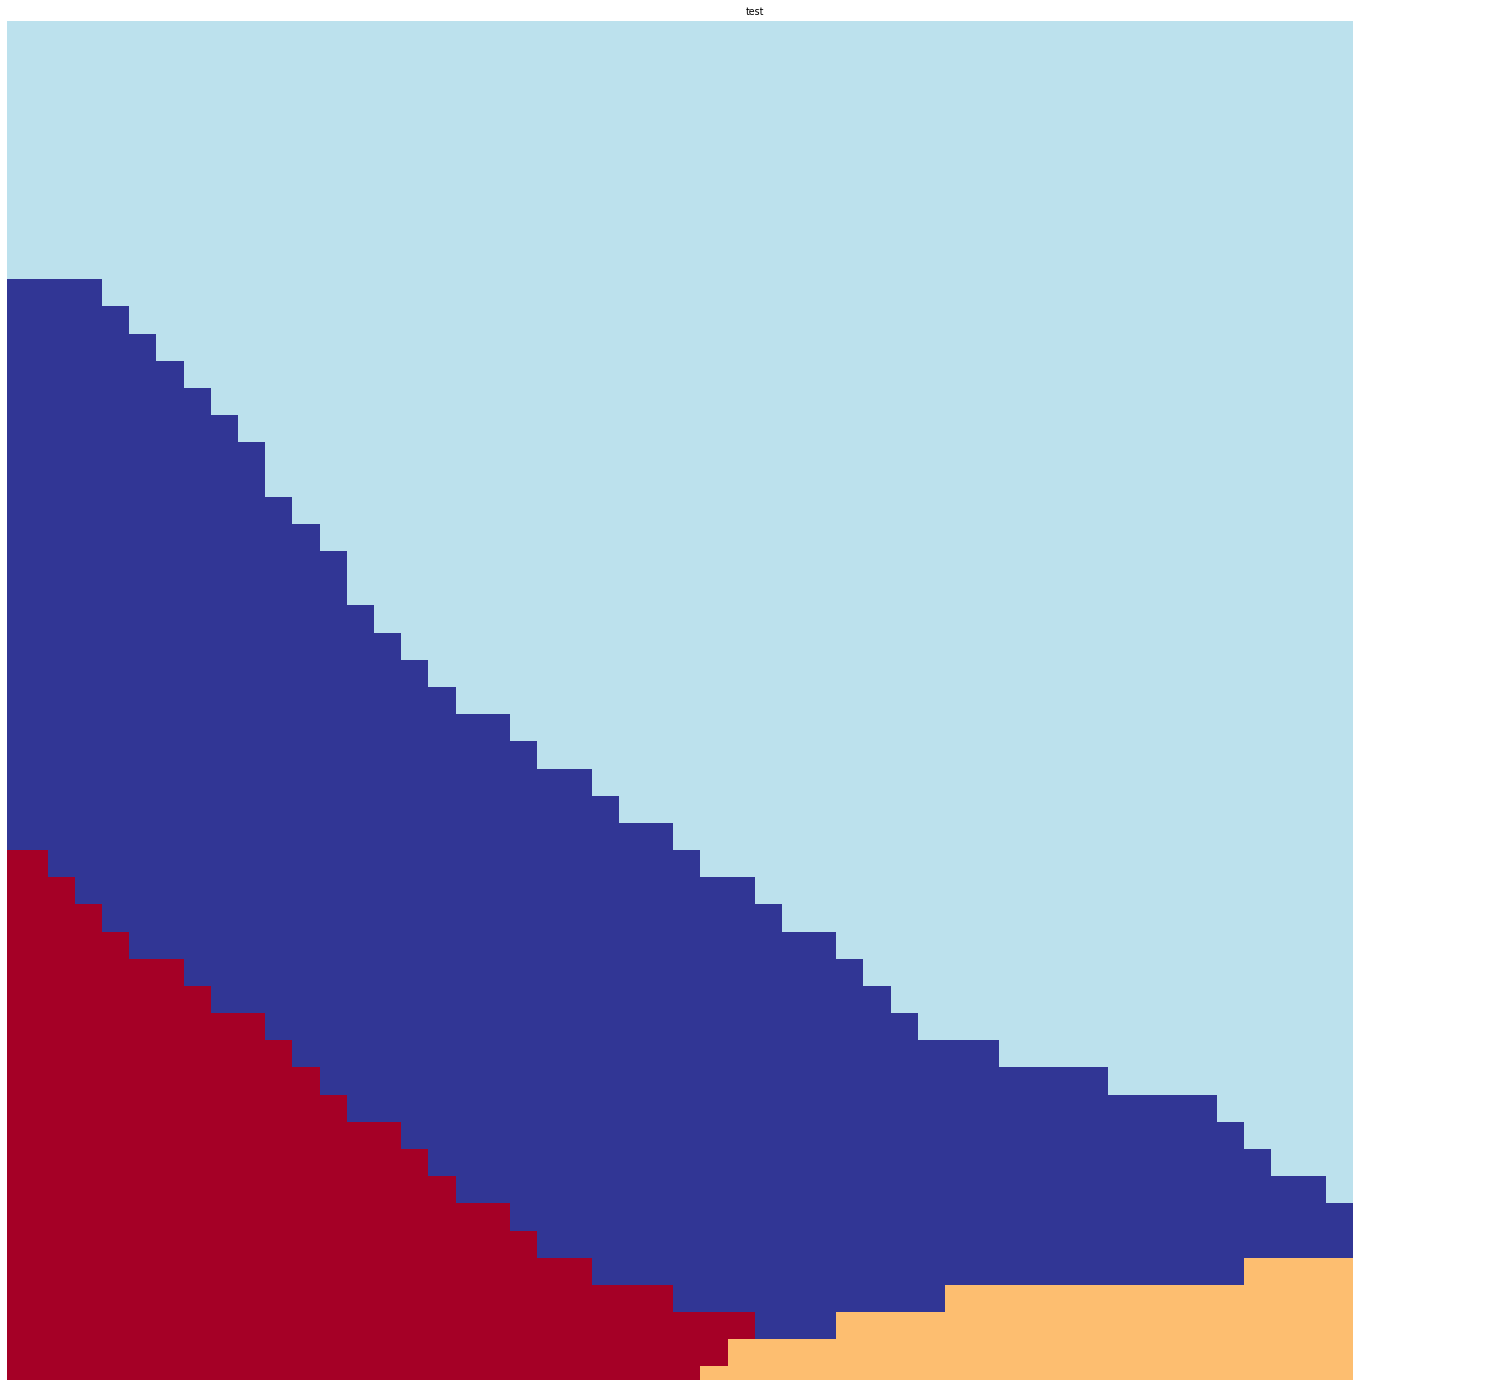

In [20]:
v.show(som, what='cluster')

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


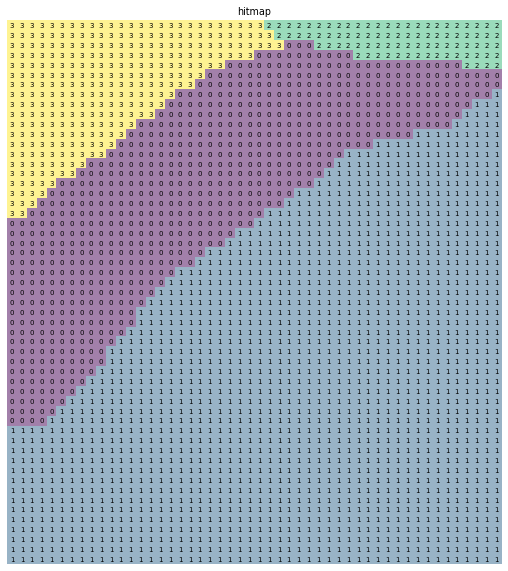

In [21]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

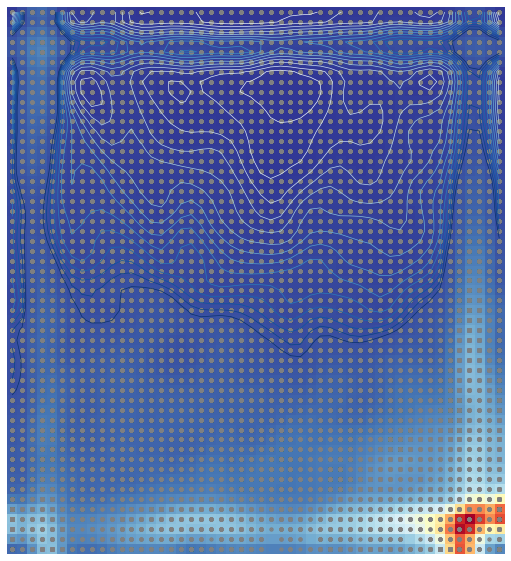

In [22]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


Retrieveing the clustered data:

## References
This notebook has been created using the templates from:

https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11

http://www.vahidmoosavi.com

https://github.com/sevamoo/sompy

